In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

df = pd.read_csv('amazon_prime_users.csv')

df


,User ID,Name,Email Address,Username,Date of Birth,Gender,Location,Membership Start Date,Membership End Date,Subscription Plan,Payment Information,Renewal Status,Usage Frequency,Purchase History,Favorite Genres,Devices Used,Engagement Metrics,Feedback/Ratings,Customer Support Interactions
0,1,Ronald Murphy,williamholland@example.com,williamholland,1953-06-03,Male,Rebeccachester,2024-01-15,2025-01-14,Annual,Mastercard,Manual,Regular,Electronics,Documentary,Smart TV,Medium,3.6,3
1,2,Scott Allen,scott22@example.org,scott22,1978-07-08,Male,Mcphersonview,2024-01-07,2025-01-06,Monthly,Visa,Manual,Regular,Electronics,Horror,Smartphone,Medium,3.8,7
2,3,Jonathan Parrish,brooke16@example.org,brooke16,1994-12-06,Female,Youngfort,2024-04-13,2025-04-13,Monthly,Mastercard,Manual,Regular,Books,Comedy,Smart TV,Low,3.3,8
3,4,Megan Williams,elizabeth31@example.net,elizabeth31,1964-12-22,Female,Feliciashire,2024-01-24,2025-01-23,Monthly,Amex,Auto-renew,Regular,Electronics,Documentary,Smart TV,High,3.3,7
4,5,Kathryn Brown,pattersonalexandra@example.org,pattersonalexandra,1961-06-04,Male,Port Deborah,2024-02-14,2025-02-13,Annual,Visa,Auto-renew,Frequent,Clothing,Drama,Smart TV,Low,4.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,2496,Michael Lopez,williamsroberto@example.org,williamsroberto,1967-08-19,Male,Smithport,2024-01-25,2025-01-24,Annual,Visa,Auto-renew,Frequent,Electronics,Comedy,Smartphone,Medium,4.9,2
2496,2497,Matthew Woodard,lkaiser@example.com,lkaiser,1980-10-23,Male,Ethanport,2024-03-03,2025-03-03,Annual,Amex,Manual,Frequent,Books,Comedy,Smart TV,Medium,4.0,0
2497,2498,Morgan Barnes,erikaholland@example.net,erikaholland,1972-03-31,Female,Alexandraborough,2024-02-09,2025-02-08,Annual,Visa,Manual,Frequent,Electronics,Documentary,Tablet,Low,4.9,8
2498,2499,Gina Castaneda,reedcourtney@example.net,reedcourtney,1965-08-02,Female,Williammouth,2024-02-18,2025-02-17,Monthly,Visa,Manual,Regular,Clothing,Comedy,Smartphone,High,3.4,7


**Business Question 1:** What underlying factors influence user preferences and interests within the Amazon Prime platform?

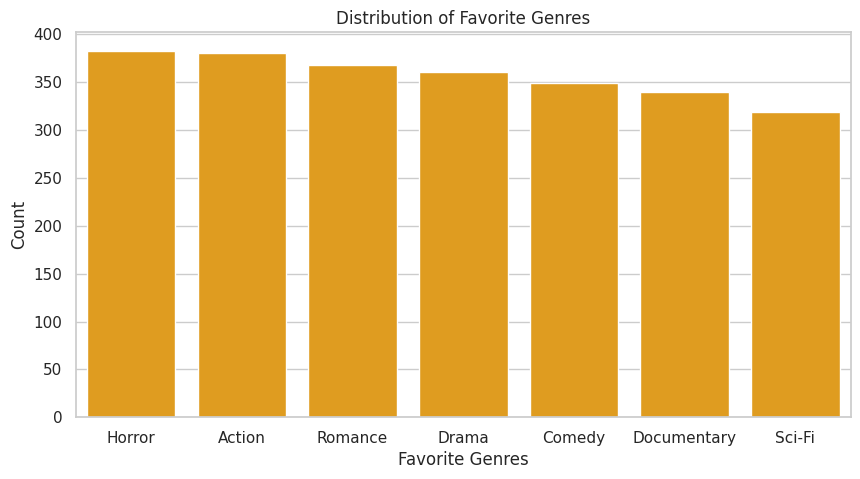

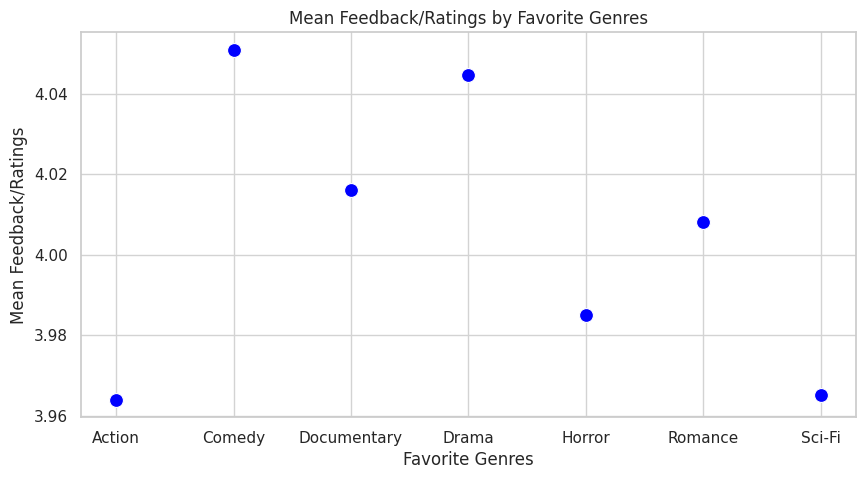

In [ ]:
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'])
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'])


plt.figure(figsize=(10, 5))
sns.set(style="whitegrid")
sns.countplot(x='Favorite Genres', data=df, order=df['Favorite Genres'].value_counts().index, color='orange')
plt.title('Distribution of Favorite Genres')
plt.xlabel('Favorite Genres')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Favorite Genres', y='Feedback/Ratings', data=df.groupby('Favorite Genres')['Feedback/Ratings'].mean().reset_index(), s=100, color='blue')
plt.title('Mean Feedback/Ratings by Favorite Genres')
plt.xlabel('Favorite Genres')
plt.ylabel('Mean Feedback/Ratings')
plt.grid(True, color='lightgray')
plt.show()

The underlying factor that influences user preferences and interest within the Amazon prime platform is the users’ feedback/ratings on their favorite genres. These two components will show us which genres are favored most by users and how well each genre meets user expectations based on their feedback/rating.

The first graph shows the distribution of favorite genres among users. We can see that Horror is the most popular genre based off user preferences.

The second graph  gives the average feedback/rating for each genre. We can see that Comedy has the highest average of feedback/rating among all the genres.  



**Business Question 2:** How do different subscription plans impact user retention rates and engagement levels?

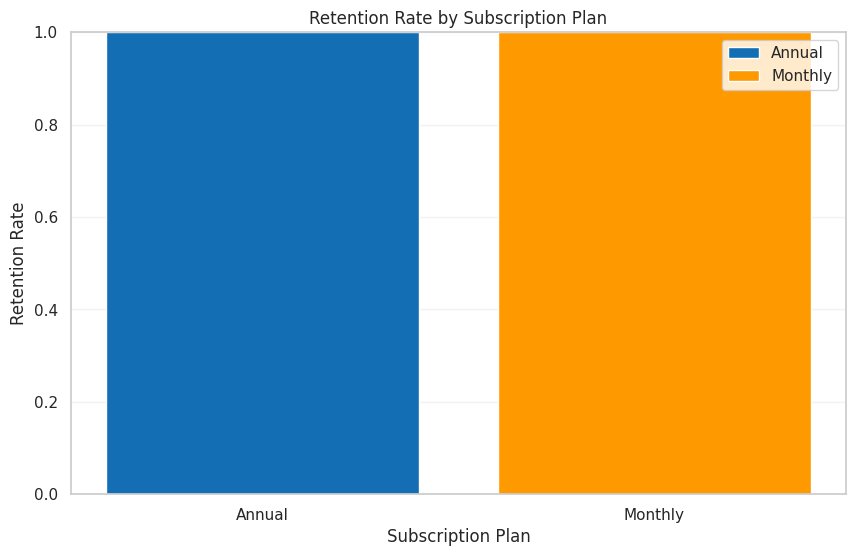

In [ ]:
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'])
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'])

df['Retention'] = (df['Membership End Date'] - df['Membership Start Date']).dt.days

color_map = {
    'Monthly': '#ff9900',  # Orange
    'Annual': '#146eb4',   # Blue
    'Biannual': '#232f3e', # Dark gray
    'Weekly': '#000000'    # Black
}

plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")

for plan in df['Subscription Plan'].unique():
    plan_df = df[df['Subscription Plan'] == plan]

    if plan == 'Monthly':
        retention_rate = len(plan_df[plan_df['Retention'] >= 30]) / len(plan_df)
    else:
        retention_rate = len(plan_df[plan_df['Retention'] >= 365]) / len(plan_df)


    plt.bar(plan, retention_rate, label=plan, color=color_map.get(plan, '#f2f2f2'))


plt.title('Retention Rate by Subscription Plan')
plt.xlabel('Subscription Plan')
plt.ylabel('Retention Rate')
plt.ylim(0, 1)
plt.legend()
plt.grid(True, color='#f2f2f2')

plt.show()


Here we can see that for annual versus monthly subscriptions, both have a 100% or 1.00 value for retention rates. Which seems odd because our prediction was that those that have an annual subscription plan might have a higher retention rate. Let's analyze further to see why we got these results.

In [ ]:
df['Membership Start Date'] = pd.to_datetime(df['Membership Start Date'])
df['Membership End Date'] = pd.to_datetime(df['Membership End Date'])


df['Subscription Length'] = (df['Membership End Date'] - df['Membership Start Date']).dt.days

print(df['Subscription Length'])



0       365
1       365
2       365
3       365
4       365
       ... 
2495    365
2496    365
2497    365
2498    365
2499    365
Name: Subscription Length, Length: 2500, dtype: int64


I went on to further analyze why we got 100% retention rates above. I converted the subscription start and end dates to date-times to be able to subtract them and get the length of the user's subscription in number of days. Here we can see that the dataset only included data from users that subscribed to Amazon Prime for one year. To further analyze and get a better answer to whether subscription plans influence retention rates we would need a more diverse dataset. But, we can still examine whether or not engagement levels are influenced by subscription plan.

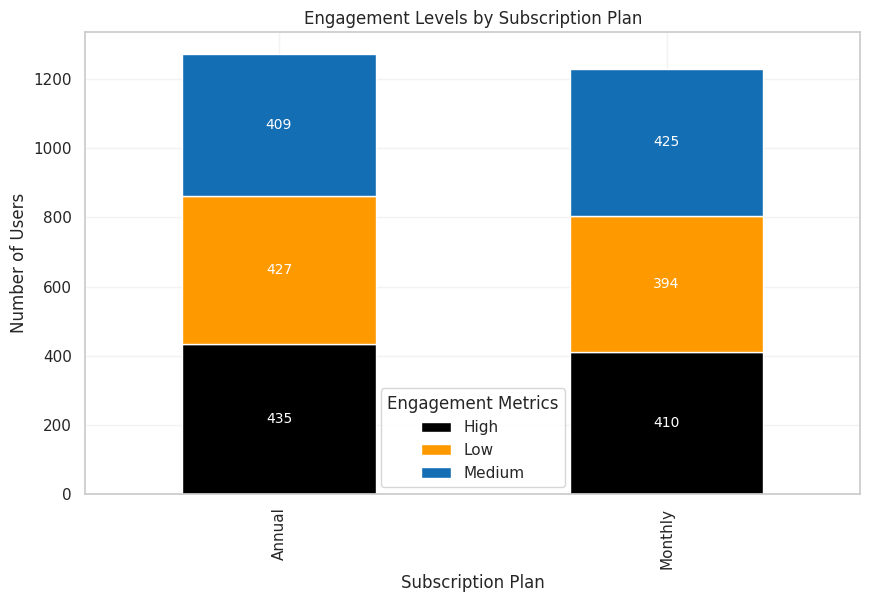

In [ ]:
engagement_counts = df.groupby(['Subscription Plan', 'Engagement Metrics']).size().unstack(fill_value=0)


colors = {
    'Low': '#ff9900',  # Orange
    'Medium': '#146eb4',  # Blue
    'High': '#000000',  # Black
    'Very High': '#232f3e'  # Dark gray
}


fig, ax = plt.subplots(figsize=(10, 6))
engagement_counts.plot(kind='bar', stacked=True, color=[colors.get(x) for x in engagement_counts.columns], ax=ax)

for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10, color='white')


plt.title('Engagement Levels by Subscription Plan')
plt.xlabel('Subscription Plan')
plt.ylabel('Number of Users')
plt.grid(True, color='#f2f2f2')
plt.show()

Here we can see that based on the counts of engagement levels for each user, there is a slight variation between those who have an annual subscription plan and those who have a monthly subscription plan. There is a higher number of users who use annual subscription plans. When it comes to individual counts for each engagement metric, those who have annual plans have the highest count for high engagement and those who have monthly plans have the highest count for medium engagement. Thus to some extent, the subscription plan a user gets has some impact on their engagement levels,

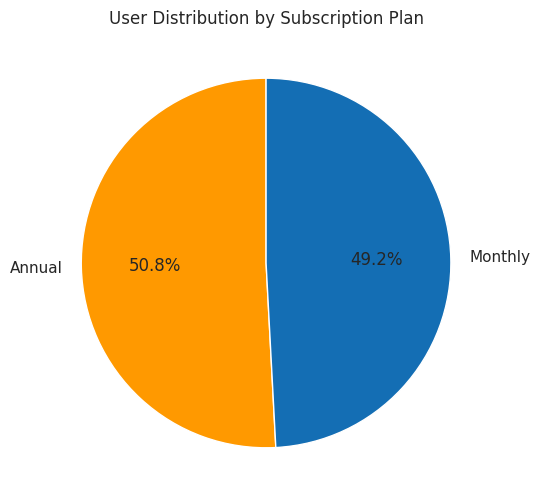

In [ ]:
user_distribution = df['Subscription Plan'].value_counts()


colors = ['#ff9900',  # Orange for 'Monthly'
          '#146eb4',  # Blue for 'Annual'
          '#232f3e',  # Dark gray for 'Biannual'
          '#000000']  # Black for 'Weekly'


user_distribution.plot(kind='pie', colors=colors, autopct='%1.1f%%', figsize=(6, 6), startangle=90)

plt.title('User Distribution by Subscription Plan')
plt.ylabel('')
plt.show()

**Business Question 3:** What areas for improvement can be identified through user feedback analysis or behavioral insights from the dataset?

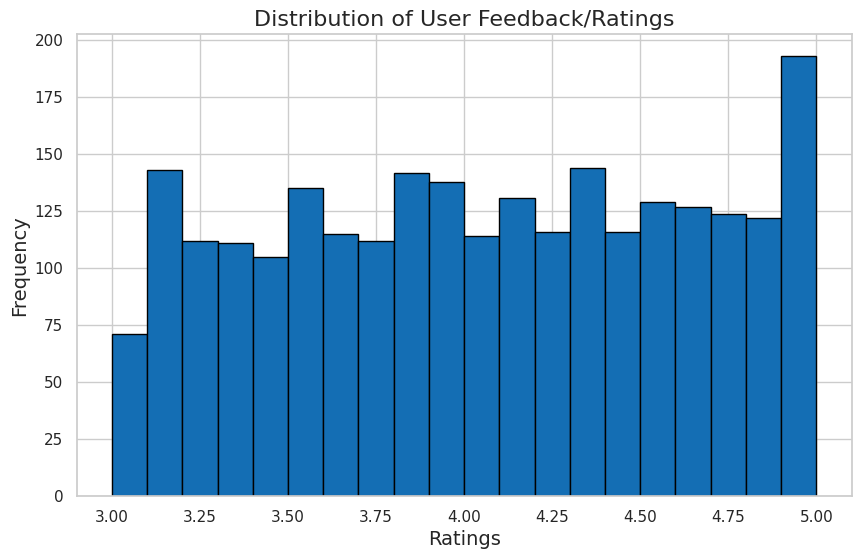

In [ ]:


plt.figure(figsize=(10, 6))


plt.hist(df['Feedback/Ratings'], bins=20, color='#146eb4', edgecolor='black')


plt.title('Distribution of User Feedback/Ratings', fontsize=16)
plt.xlabel('Ratings', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.show()




Analyzing the distribution of user ratings and feedbacks, among low ratings can significantly inform and guide improvements. This approach not only identifies what the issues are but also provides actionable insights to enhance user satisfaction and service quality.

By plotting the distribution, you can visually assess how satisfied users are overall. A skew towards higher ratings generally indicates satisfaction, while a skew towards lower ratings indicates issues. For example, a significant number of users rate 1 or 2, this clearly indicates a problem area needing immediate attention.





**Business Question 4:** Who comprises the primary user segments of Amazon Prime based on demographic data?

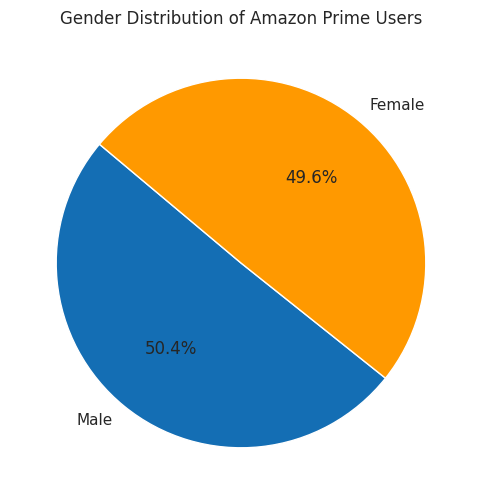

In [ ]:
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(8, 6))

colors = ['#146eb4', '#ff9900']

gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Gender Distribution of Amazon Prime Users')
plt.ylabel('')
plt.show()

The pie chart shows that Amazon Prime's users are almost equally split between males and females, with 50.4% being male and 49.6% being female. This even distribution means that Amazon Prime appeals to both genders similarly. Therefore, the primary user segments of Amazon Prime include both males and females in nearly equal numbers, indicating that the platform is attractive to a wide and diverse audience.

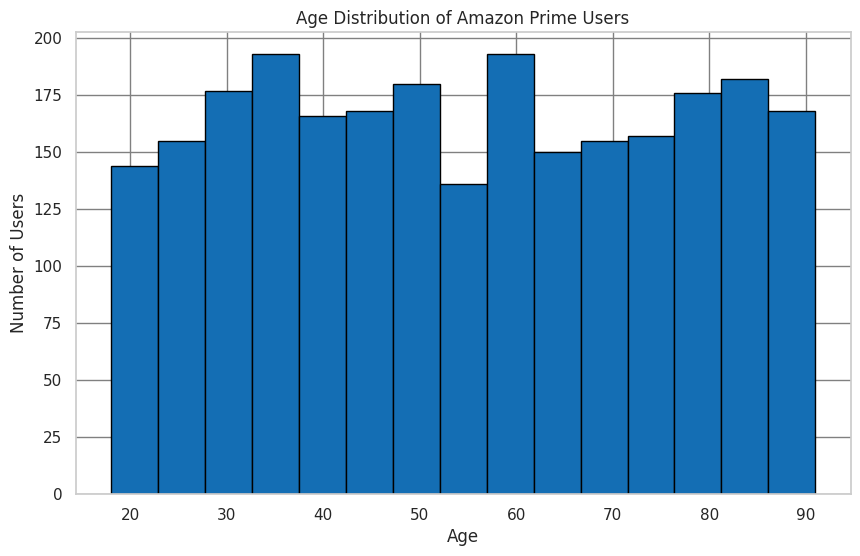

In [ ]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Date of Birth'].dt.year

plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=15, color='#146eb4', edgecolor='black')
plt.title('Age Distribution of Amazon Prime Users')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True, color='grey')
plt.show()

plt.show()

The histogram shows that Amazon Prime users are from all age groups, ranging from 20 to 90 years old, with many users around the ages of 30, 50, and 60. This wide age range means Amazon Prime is popular with both young adults and older people. So, the primary user segments of Amazon Prime include people of all ages, showing its broad appeal.

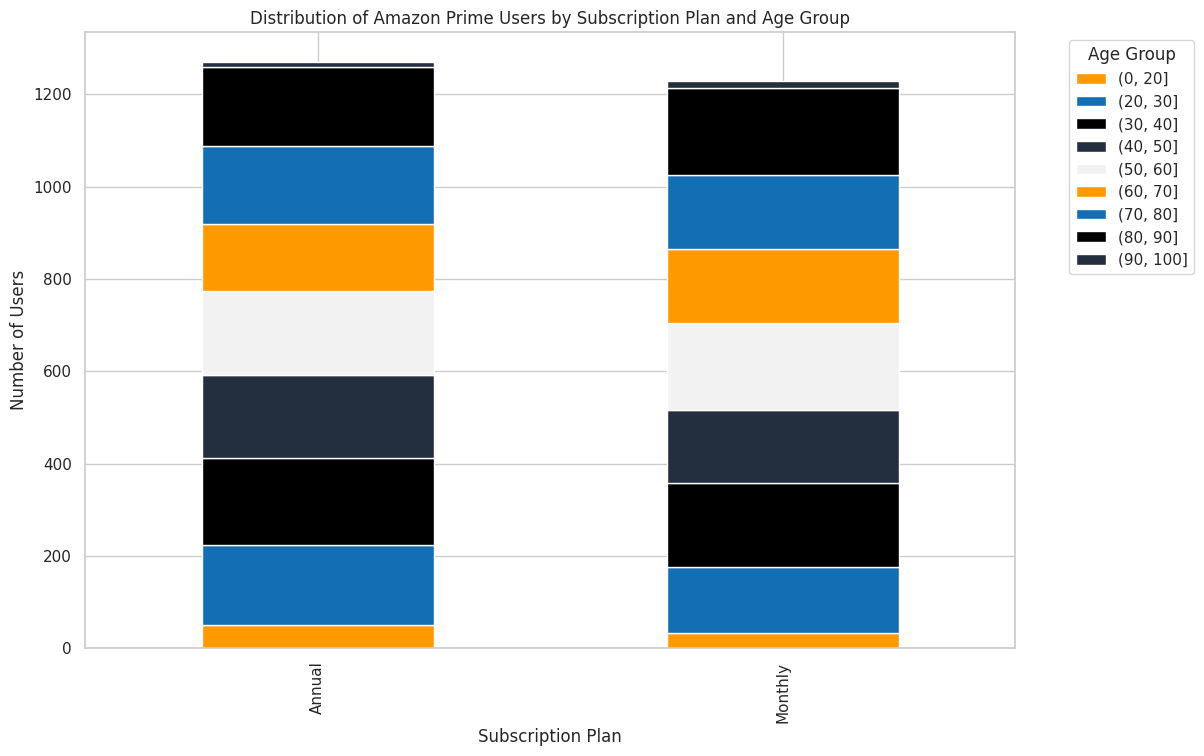

In [ ]:
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])
current_year = pd.Timestamp.now().year
df['Age'] = current_year - df['Date of Birth'].dt.year

age_bins = [0, 20, 30, 40, 50, 60, 70, 80, 90, 100]
df['Age Group'] = pd.cut(df['Age'], bins=age_bins)

subscription_age_group = df.groupby(['Subscription Plan', 'Age Group']).size().unstack().fillna(0)

colors = ['#ff9900',  # Orange for 0-20
          '#146eb4',  # Blue for 20-30
          '#000000',  # Black for 30-40
          '#232f3e',  # Dark gray for 40-50
          '#f2f2f2',  # Light gray for 50-60
          '#ff9900',  # Orange for 60-70
          '#146eb4',  # Blue for 70-80
          '#000000',  # Black for 80-90
          '#232f3e']  # Dark gray for 90-100

ax = subscription_age_group.plot(kind='bar', stacked=True, figsize=(12, 8), color=colors)
plt.title('Distribution of Amazon Prime Users by Subscription Plan and Age Group')
plt.xlabel('Subscription Plan')
plt.ylabel('Number of Users')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Amazon Prime's primary user segments include both men and women equally. Users are from a wide range of ages, from young adults to seniors. There is also a nearly equal preference for Annual and Monthly subscription plans. This shows that Amazon Prime appeals to a diverse group of people, regardless of gender, age, or subscription preference.

**Business Question 5:** How does device usage correlate with customer support interactions and engagement levels on Amazon Prime?

* Engagement Metrics by Device Used:



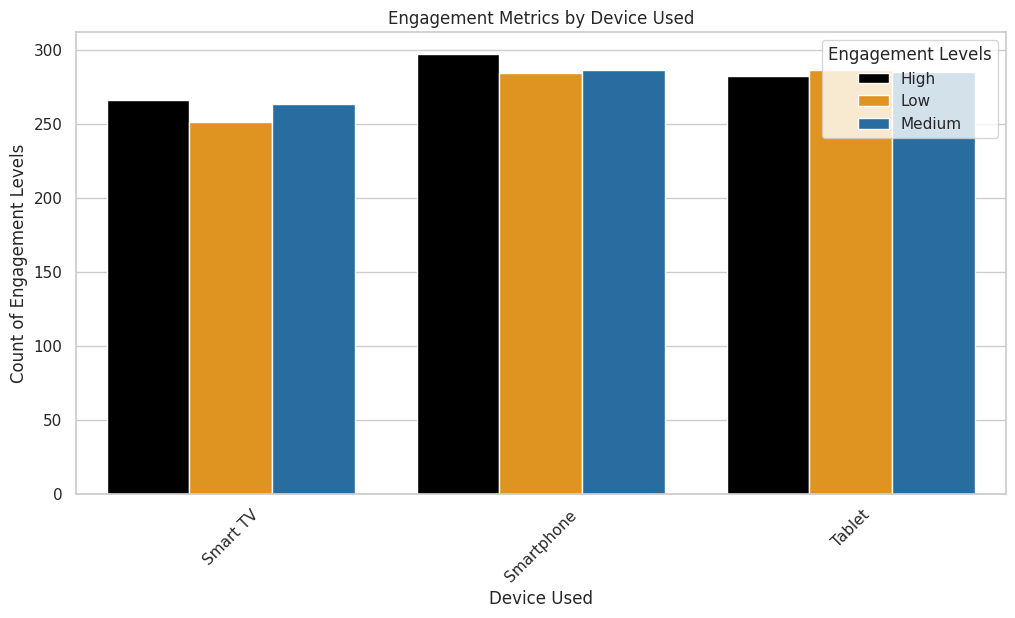

In [ ]:
# Graph 1: Engagement Metrics by Device Used
engagement_counts = df.groupby(['Devices Used', 'Engagement Metrics'])['User ID'].count().reset_index()
engagement_counts.columns = ['Devices Used', 'Engagement Metrics', 'Count']

colors = {
    'Low': '#ff9900',  # Orange
    'Medium': '#146eb4',  # Blue
    'High': '#000000',  # Black
    'Very High': '#232f3e'  # Dark gray
}

plt.figure(figsize=(12, 6))
sns.barplot(x='Devices Used', y='Count', hue='Engagement Metrics', data=engagement_counts, palette=colors)

plt.title('Engagement Metrics by Device Used')
plt.xlabel('Device Used')
plt.ylabel('Count of Engagement Levels')
plt.xticks(rotation=45)
plt.legend(title='Engagement Levels')
plt.show()

Smartphones have significantly higher "High" engagement metrics, suggesting that this device offers a better user experience however, they also have the highest number of "Low" engagement metrics which could mean there is user dissatisfaction or difficulties in using the platform on this device. It is necessary to look at other factors such as customer support interactions as well to get better insight.

* Customer Support Interactions by Device Used:

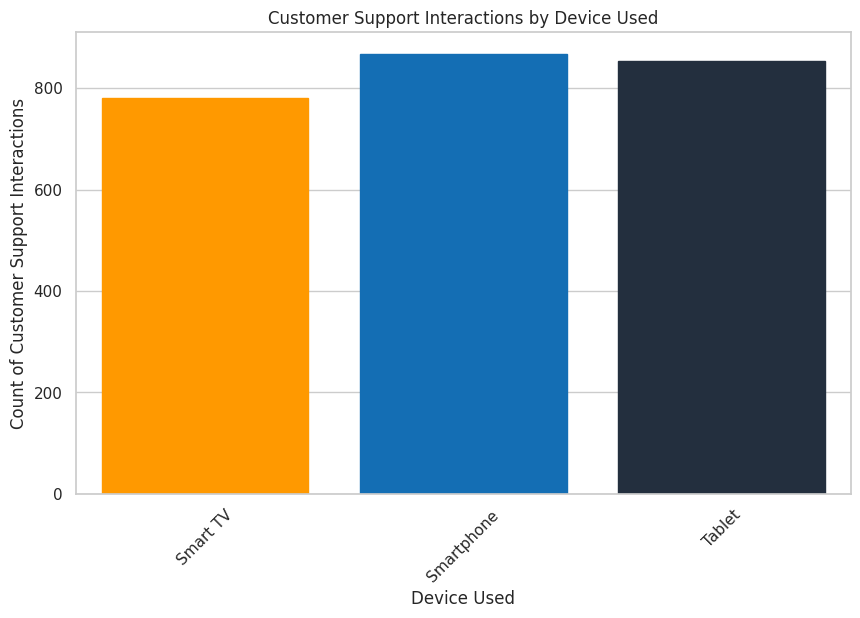

In [ ]:
# Graph 2: Customer Support Interactions by Device Used
unique_devices = df['Devices Used'].nunique()
colors = sns.color_palette("viridis", unique_devices)  # Generate a color palette

device_order = ['Smart TV', 'Smartphone', 'Tablet']

colors = {
    'Smart TV': '#ff9900',   # Orange
    'Smartphone': '#146eb4', # Blue
    'Tablet': '#232f3e'      # Dark gray
}

plt.figure(figsize=(10, 6))
bar_plot = sns.countplot(x='Devices Used', data=df, order=device_order)

for bar, device in zip(bar_plot.patches, device_order):
    bar.set_color(colors[device])

plt.title('Customer Support Interactions by Device Used')
plt.xlabel('Device Used')
plt.ylabel('Count of Customer Support Interactions')
plt.xticks(rotation=45)
plt.show()

Now, we can see that even though Smartphones have the highest engagement, they also have the most issues indicated by the high volume of customer support interactions. On the other hand, Smart TVs and Tablets users do not have as many customer support interactions.

* Comparison of Engagement Metrics with Customer Support Interactions by Device:

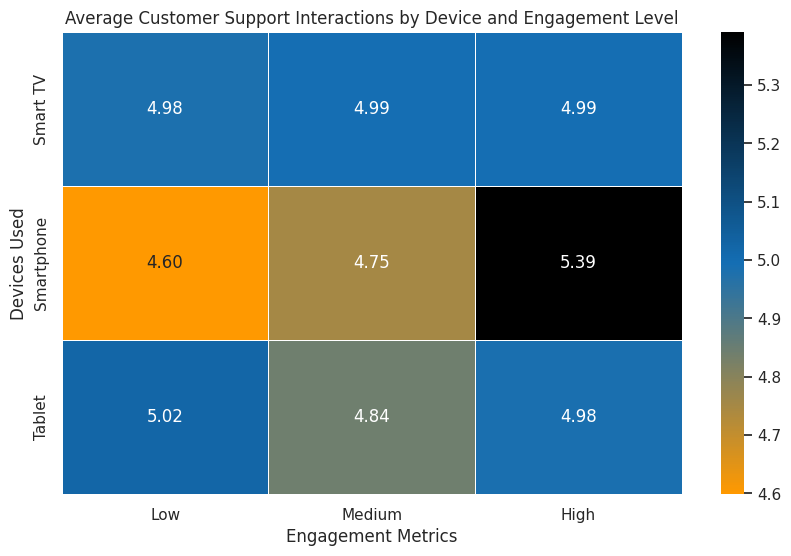

In [ ]:
# Graph 3: Comparison of Engagement Metrics with Customer Support Interactions by Device
from matplotlib.colors import LinearSegmentedColormap

engagement_order = ['Low', 'Medium', 'High']
df['Engagement Metrics'] = pd.Categorical(df['Engagement Metrics'], categories=engagement_order, ordered=True)

pivot_table = df.pivot_table(index='Devices Used', columns='Engagement Metrics', values='Customer Support Interactions', aggfunc='mean')

colors = ['#ff9900',  # Orange
          '#146eb4',  # Blue
          '#000000']  # Black

custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", colors, N=256)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap=custom_cmap, linewidths=.5)
plt.title('Average Customer Support Interactions by Device and Engagement Level')
plt.xlabel('Engagement Metrics')
plt.ylabel('Devices Used')
plt.show()

This heatmap helps in quickly identifying which devices are associated with high engagement and low customer support interactions (indicative of a positive user experience). Devices and engagement levels that have higher average interactions (lighter colored cells) might indicate areas where users are experiencing more issues or require more assistance. For instance, the high engagement with Smartphones having a rating of 5.39 suggests that while these users are highly engaged, they also face issues that lead to more support calls.

* The Smart TV shows almost identical customer support interactions across Low, Medium, and High engagement levels (all around 4.98 to 4.99). This consistency suggests a stable user experience that does not drastically change with increased engagement.
* The Smartphone shows increasing customer support interactions as engagement levels increase, with a notable spike at High engagement (5.39). This might indicate that while Smartphones are highly engaging, they may also present more issues or complexities that require support as users engage more deeply.
* The Tablet also shows relatively stable customer support interactions across all engagement levels, similar to the Smart TV, but with slightly higher interactions at Low and High engagement compared to the Smart TV.

Given the lower and consistent number of customer support interactions across all engagement levels, coupled with presumably equal levels of engagement (since engagement specifics like time spent or satisfaction aren't directly shown but can be inferred from consistency), **the Smart TV appears to be the best device**. It likely offers a balance of engaging content with fewer complications or issues requiring customer support, suggesting a more seamless user experience.

While Tablets and Smartphones are useful, the slightly higher interaction numbers at various engagement levels suggest these devices might still encounter issues that occasionally disrupt the user experience. Smartphones, in particular, might benefit from targeted improvements to address issues that highly engaged users face.
